In [81]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import datetime


In [82]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")

# Declare a Base using `automap_base()`
Base = automap_base()


In [83]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()


['Measurement', 'Station']

In [84]:
# Assign the measurements class to a variable called `Measurements`
Measurements = Base.classes.Measurement
Station = Base.classes.Station


In [85]:
# Create a session
### BEGIN SOLUTION
session = Session(engine)
from dateutil.relativedelta import relativedelta
from datetime import date
import pandas as pd
### END SOLUTION
# Use the session to query Measurements table and display the first 5 locations
### BEGIN SOLUTION
counter = 0
for row in session.query(Measurements, Measurements.date).filter(Measurements.date < datetime.datetime.now()).\
    filter(Measurements.date > datetime.datetime.now()+ relativedelta(months=-12)):
    print(row)
    counter = counter + 1
### END SOLUTION
print(counter)

(<sqlalchemy.ext.automap.Measurement object at 0x117b19b00>, datetime.date(2016, 12, 31))
(<sqlalchemy.ext.automap.Measurement object at 0x117b4ca20>, datetime.date(2017, 1, 1))
(<sqlalchemy.ext.automap.Measurement object at 0x117b4c748>, datetime.date(2017, 1, 2))
(<sqlalchemy.ext.automap.Measurement object at 0x117b4c8d0>, datetime.date(2017, 1, 3))
(<sqlalchemy.ext.automap.Measurement object at 0x112e5ef60>, datetime.date(2017, 1, 4))
(<sqlalchemy.ext.automap.Measurement object at 0x113143e48>, datetime.date(2017, 1, 5))
(<sqlalchemy.ext.automap.Measurement object at 0x112d8f940>, datetime.date(2017, 1, 6))
(<sqlalchemy.ext.automap.Measurement object at 0x112d8f0b8>, datetime.date(2017, 1, 7))
(<sqlalchemy.ext.automap.Measurement object at 0x112d8f208>, datetime.date(2017, 1, 8))
(<sqlalchemy.ext.automap.Measurement object at 0x112e56be0>, datetime.date(2017, 1, 9))
(<sqlalchemy.ext.automap.Measurement object at 0x112e561d0>, datetime.date(2017, 1, 10))
(<sqlalchemy.ext.automap.Meas

In [86]:
result_1_stmt = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date < datetime.datetime.now()).\
    filter(Measurements.date > datetime.datetime.now()+ relativedelta(months=-12)).statement
result_1_df = pd.read_sql_query(result_1_stmt, session.bind)
result_1_df.head()

,date,prcp
0,2016-12-31,0.01
1,2017-01-01,0.00
2,2017-01-02,0.00
3,2017-01-03,0.00
4,2017-01-04,0.00


In [87]:
#result_1_df.set_index('date', inplace=True)


In [88]:
result_1_df.head()
print(result_1_df["prcp"])

0       0.01
1       0.00
2       0.00
3       0.00
4       0.00
5       0.00
6       0.00
7       0.00
8       0.00
9       0.00
10      0.00
11      0.00
12      0.00
13      0.00
14      0.00
15      0.00
16      0.00
17      0.00
18      0.00
19      0.00
20      0.00
21      0.00
22      0.16
23      0.00
24      0.04
25      0.03
26      0.00
27      0.00
28      0.00
29      0.18
        ... 
1242    0.39
1243    2.40
1244    0.27
1245    0.70
1246    0.10
1247    4.00
1248    0.80
1249    0.84
1250    0.30
1251    0.30
1252    0.00
1253    0.40
1254    0.30
1255    0.30
1256    0.00
1257    0.25
1258    0.06
1259    0.05
1260    0.34
1261    0.15
1262    0.07
1263    0.14
1264    0.22
1265    0.42
1266    0.42
1267    0.13
1268    0.09
1269    0.56
1270    0.50
1271    0.45
Name: prcp, Length: 1272, dtype: float64


In [89]:
result_1_df.describe()
len(result_1_df)

1272

In [105]:
import matplotlib.pyplot as plt
import numpy as np
def computeTicks (x, step = 50):
    """
    Computes domain with given step encompassing series x
    @ params
    x    - Required - A list-like object of integers or floats
    step - Optional - Tick frequency
    """
    import math as Math
    xMax, xMin = Math.ceil(max(x)), Math.floor(min(x))
    dMax, dMin = xMax + abs((xMax % step) - step) + (step if (xMax % step != 0) else 0), xMin - abs((xMin % step))
    return range(dMin, dMax, step)

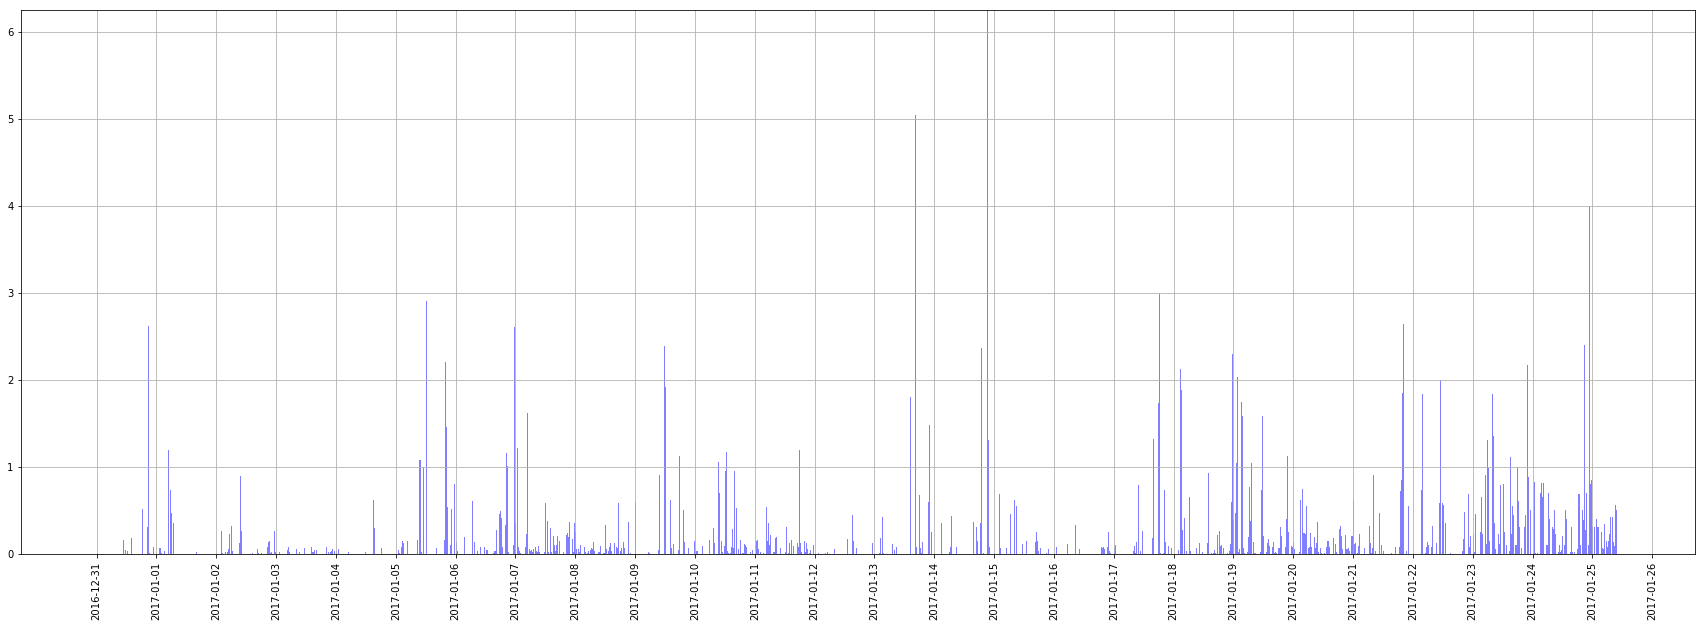

In [106]:
# Set x axis and tick locations
x_axis = np.arange(len(result_1_df))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(30,10))
plt.bar(x_axis, result_1_df["prcp"], color='b', alpha=0.5, align="edge")
plt.xticks(computeTicks(tick_locations), result_1_df["date"], rotation="vertical")

# Set x and y limits
plt.ylim(0, max(result_1_df["prcp"]))
plt.grid(True)
# Save our graph and show the grap
plt.savefig("precipitation.png")
plt.show()